In [3]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)

import nltk
import collections as co
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [6]:
#read loans.csv as a dataframe
loans_df = pd.read_csv('~/Downloads/tanay/loan.csv',low_memory=False, engine='c')

In [8]:
loans_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 76 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [10]:
loans_df.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

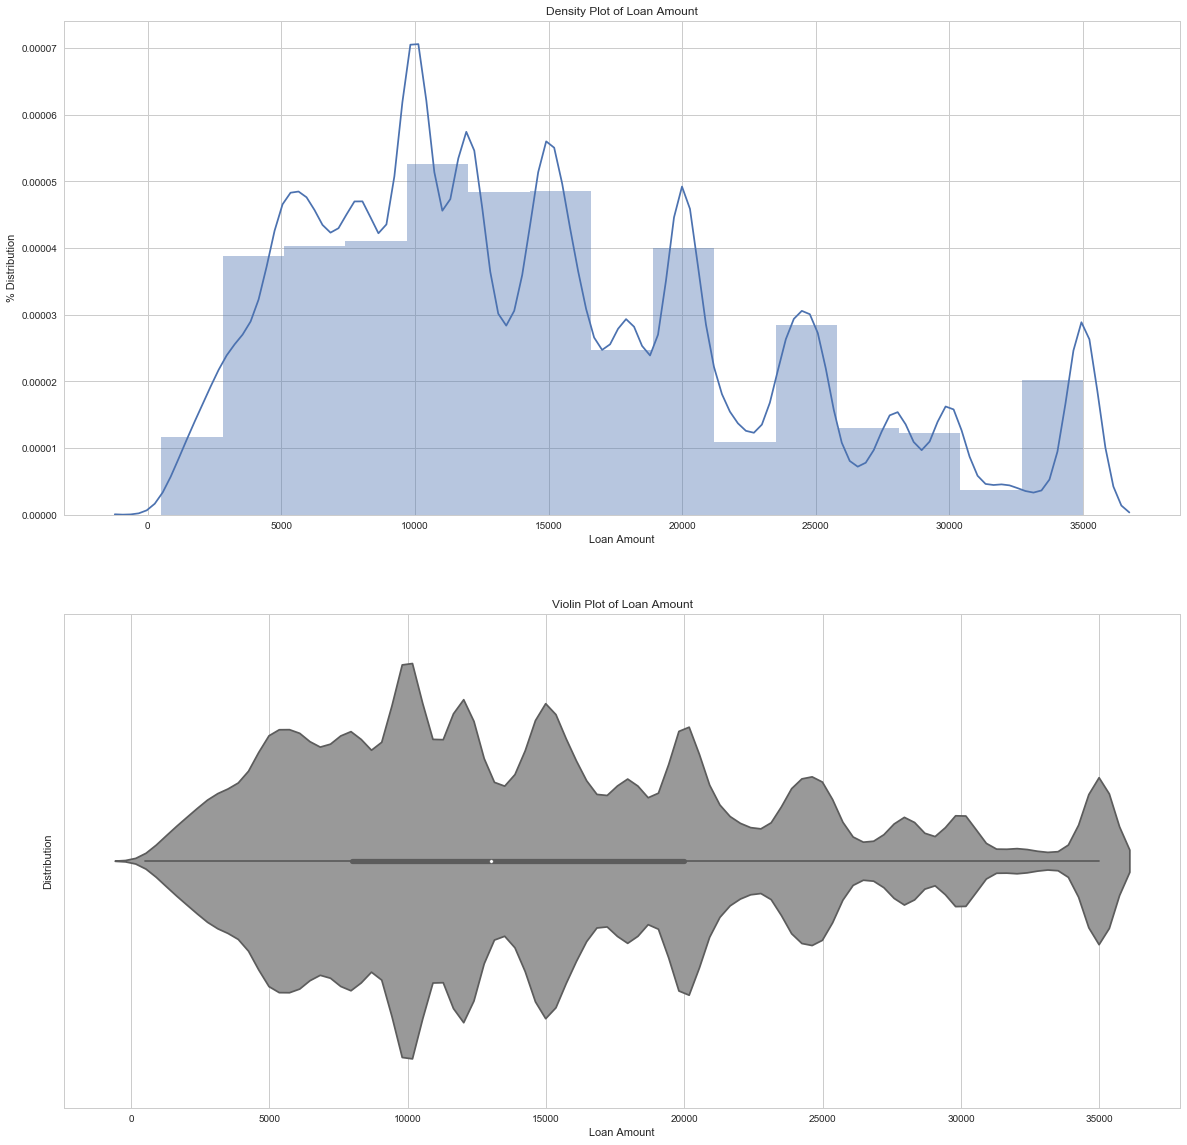

In [11]:
#visual EDA to understand the distribution of loan amount

sns.set_style("whitegrid")
fig, axs = plt.subplots(2,1,figsize=(20,20))

sns.distplot(loans_df.loan_amnt, ax=axs[0], hist=True, kde=True, bins=15)
axs[0].set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')

sns.violinplot(loans_df.loan_amnt, ax=axs[1], color='0.6')
axs[1].set(xlabel='Loan Amount', 
       ylabel='Distribution',title='Violin Plot of Loan Amount')

plt.show()

In [12]:
loans_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [13]:
#define a function to classify loan status into one of the following bins ('Fully Paid', 'Default', 'Current')
def loan_status_bin(text):
    if text in ('Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'):
        return 'Fully Paid'
    elif text in ('Current', 'Issued'):
        return 'Current'
    elif text in ('Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'):
        return 'Default'
    elif text in ('Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period'):
        return 'Late'
    else:
        'UNKNOWN BIN'

In [78]:
#create a new attribute 'loan_status_bin' in the dataframe
loans_df['loan_status_bin']=loans_df['loan_status'].apply(loan_status_bin)
loans_df['loan_status_bin'].unique()

array(['Fully Paid', 'Default', 'Current', 'Late'], dtype=object)

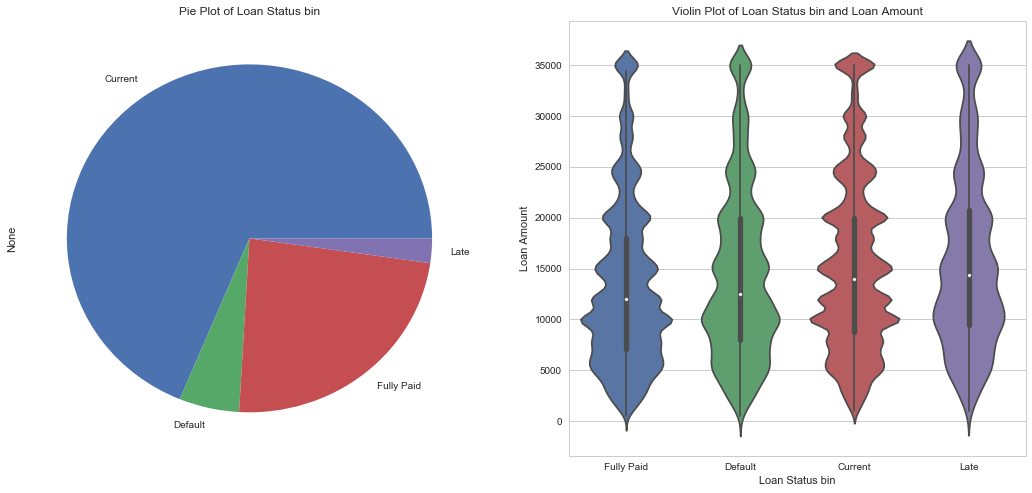

In [15]:
#visual EDA of the loan status bin, and a violin plot which captures the loan amount along with the loan status bin

sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2,figsize=(18,8))

loans_df.groupby('loan_status_bin').size().plot(kind='pie', ax=axs[0]);
axs[0].set(title='Pie Plot of Loan Status bin')

sns.violinplot(x=loans_df['loan_status_bin'], y=loans_df['loan_amnt'], ax=axs[1])
axs[1].set(xlabel='Loan Status bin', 
       ylabel='Loan Amount',title='Violin Plot of Loan Status bin and Loan Amount')

plt.show()

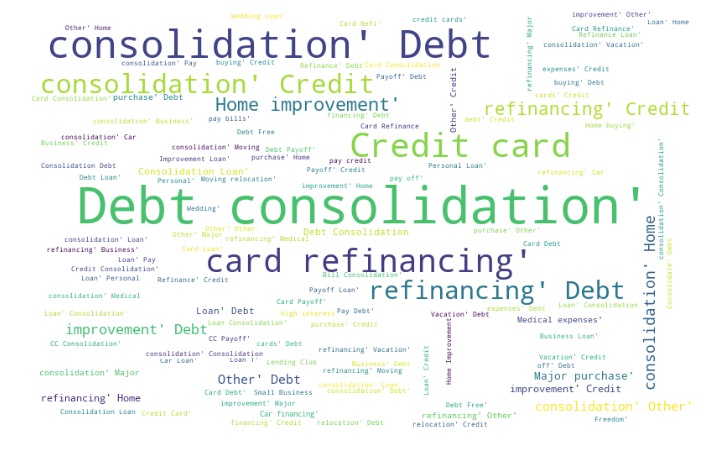

In [65]:
#word cloud
plt.rcParams['figure.figsize'] = (12,12)
loans_df['title'].unique()

list_wc = list()
loans_df['title'].apply(lambda x: list_wc.append(x))
string_wc=str(list_wc)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=120, width=800, height=500).generate(string_wc)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
loans_df.desc.unique()

array([ '  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'I need a lower interest loan to pay off my citifinancial loan.  ',
       'I am looking for a loan to pay my credit cards off as well as making some very much needed auto repairs',
       'I am in my senior year of college in obtaining a bachelors degree in criminal justice.  I do no

In [27]:
#(loan status bin, term, title)
loans_df.title.head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [74]:
np.unique(loans_df.emp_length.astype(str))

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'n/a'], dtype=object)

In [75]:
loans_df.id[loans_df['emp_length'].isnull()].count()

0

In [23]:
def employment_len(text):
    if text=='10+ years':
        return '10+ years'
    elif text in ('1 year','2 years', '3 years', '4 years','5 years'):
        return '1 to 5 years'
    elif text in ('6 years', '7 years', '8 years', '9 years'):
        return '6 to 9 years'
    elif text== '< 1 year':
        return 'Less than 1 year'
    else:
        return 'n/a'

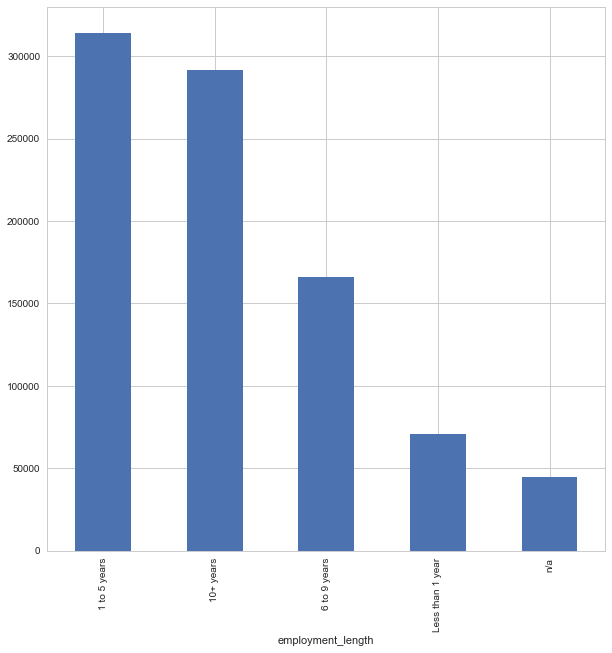

In [28]:
plt.rcParams['figure.figsize'] = (10,10)
loans_df['employment_length']=loans_df['emp_length'].apply(employment_len)
_=loans_df.groupby('employment_length').size().plot(kind='bar')

In [47]:
loans_df[loans_df['annual_inc'].isnull()==True]['annual_inc']

42449   NaN
42450   NaN
42480   NaN
42533   NaN
Name: annual_inc, dtype: float64

In [76]:
print('Median annual income is {0} and Mean annual income is {1}'.format(loans_df['annual_inc'].median(), loans_df['annual_inc'].mean()))

Median annual income is 65000.0 and Mean annual income is 75027.54255984195


In [53]:
loans_df.fillna(loans_df.median()['annual_inc'], inplace=True)

In [58]:
loans_df[loans_df['annual_inc'].isnull()==True]['annual_inc'].count()

0

In [83]:
loans_df_fp=loans_df[loans_df['loan_status_bin']=='Fully Paid']

In [84]:
loans_df_def=loans_df[loans_df['loan_status_bin']=='Default']

In [85]:
loans_df_fp.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,2.097110e+05,2.097110e+05,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,2.097110e+05,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.00000,209711.000000,2.097110e+05,209711.000000,209711.000000,209711.0,209711.0,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.0,209711.0,209711.000000,209711.000000,209711.000000,209711.0,209711.000000,209711.000000,209711.000000,2.097110e+05,2.097110e+05,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,209711.000000,2.097110e+05,209711.000000,209711.000000,209711.000000
mean,1.243712e+07,1.374705e+07,13303.757433,13262.990973,13155.243148,13.280921,411.977473,7.414250e+04,16.119893,8.302936,8.912246,36175.082757,56785.452303,18.96767,8.201320,1.532602e+04,110.781434,33.250936,0.0,0.0,15142.595644,15012.320652,13240.284797,1901.953282,0.357572,0.0,0.0,7717.238363,36.270563,52984.774170,1.0,64999.861714,64999.690134,8.061642,1.741857e+04,1.228731e+05,64955.368107,64955.369261,64955.367754,64955.368431,64956.620778,64980.404333,64960.990510,64955.368297,64955.369590,64959.155681,64955.407623,3.963980e+04,64955.368011,64955.368588,64955.368951
std,1.526204e+07,1.625732e+07,8053.295369,8031.817993,8063.385706,4.256955,244.154430,5.920529e+04,7.695939,723.705921,723.699644,32275.873317,21583.815739,723.60333,723.706814,1.977689e+04,1933.518264,723.524219,0.0,0.0,9440.203497,9465.746763,8033.522707,2020.401950,3.735573,0.0,0.0,7500.825788,1534.883767,25221.096109,0.0,63.326778,141.900897,723.708242,3.492750e+04,1.390251e+05,1702.654572,1702.610551,1702.668034,1702.642203,1678.357243,1245.243235,1590.985267,1702.647296,1702.597999,1562.602674,1701.147137,3.013753e+04,1702.658211,1702.636202,1702.622377
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,36000.000000,17.600000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000
25%,1.418134e+06,1.662332e+06,7075.000000,7000.000000,7000.000000,10.160000,232.910000,4.500000e+04,10.400000,0.000000,0.000000,37.000000,65000.000000,7.00000,0.000000,5.759000e+03,34.800000,17.000000,0.0,0.0,8004.375000,7852.455000,7000.000000,619.670000,0.000000,0.0,0.0,1481.925000,0.000000,65000.000000,1.0,65000.000000,65000.000000,0.000000,0.000000e+00,4.089650e+04,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,1.660000e+04,65000.000000,65000.000000,65000.000000
50%,6.167281e+06,7.410414e+06,12000.000000,11925.000000,11550.000000,13.110000,358.570000,6.400000e+04,15.740000,0.000000,1.000000,65000.000000,65000.000000,10.00000,0.000000,1.083300e+04,54.500000,24.000000,0.0,0.0,12918.021863,12810.100000,11825.000000,1285.160000,0.000000,0.0,0.0,5684.870000,0.000000,65000.000000,1.0,65000.000000,65000.000000,0.000000,0.000000e+00,6.500000e+04,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,

In [86]:
loans_df_def.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.722800e+04,4.722800e+04,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,4.722800e+04,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,4.722800e+04,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.000000,47228.0,47228.0,47228.0,47228.000000,47228.000000,4.722800e+04,47228.0,47228.0,47228.0,47228.0,47228.0,47228.0,47228.0,47228.0,47228.0,47228.0,47228.0,4.722800e+04,47228.0,47228.0,47228.0
mean,1.121693e+07,1.251437e+07,14491.714131,14443.582197,14272.727325,15.996180,438.883186,6.519977e+04,18.378162,4.406623,5.168417,35775.795778,56558.002795,15.172906,4.275472,1.519102e+04,133.621932,28.323812,299.277859,299.191337,6333.498192,6246.213549,3326.218271,2142.006411,2.485068,862.788436,91.705802,452.589293,38.544613,52504.502139,1.0,65000.0,65000.0,4.132781,14964.572986,1.030664e+05,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,3.522851e+04,65000.0,65000.0,65000.0
std,1.229585e+07,1.314738e+07,8387.693724,8362.244913,8421.571275,4.283602,246.878351,5.695516e+04,7.955576,518.040446,518.035349,32319.424343,21836.474917,517.977683,518.041072,1.940340e+04,2194.799355,517.978690,2201.733545,2201.124474,5416.957812,5395.149984,3288.187195,2234.671875,10.153914,1564.935212,258.670488,647.942165,1582.225433,25603.724819,0.0,0.0,0.0,518.042021,27265.016827,1.141012e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.758848e+04,0.0,0.0,0.0
min,5.641300e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.910000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,65000.0,65000.0,0.000000,0.000000,0.000000e+00,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,0.000000e+00,65000.0,65000.0,65000.0
25%,1.547735e+06,1.802301e+06,8000.000000,8000.000000,8000.000000,13.050000,262.955000,4.000000e+04,12.560000,0.000000,0.000000,35.000000,65000.000000,8.000000,0.000000,6.171000e+03,43.100000,16.000000,0.000000,0.000000,2480.210000,2411.375000,1101.352500,680.455000,0.000000,0.000000,0.000000,234.482500,0.000000,65000.000000,1.0,65000.0,65000.0,0.000000,0.000000,3.263600e+04,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,1.470000e+04,65000.0,65000.0,65000.0
50%,6.615342e+06,8.078938e+06,12500.000000,12425.000000,12150.000000,15.700000,388.130000,5.600000e+04,18.330000,0.000000,1.000000,65000.000000,65000.000000,10.000000,0.000000,1.129950e+04,61.500000,23.000000,0.000000,0.000000,4826.910000,4742.145000,2316.220000,1424.705000,0.000000,16.945000,0.000000,373.265000,0.000000,65000.000000,1.0,65000.0,65000.0,0.000000,0.000000,6.500000e+04,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,2.710000e+04,65000.0,65000.0,65000.0
75%,1.544096e+07,1.740336e+07,20000.000000,20000.000000,19950.000000,18.850000,570.840000,7.800000e+04,24.070000,0.000000,2.000000,65000.000000,65000.000000,14.000000,0.000000,1.921700e+04,78.100000,31.000000,0.000000,0.000000,8571.912500,8476.842500,4449.0

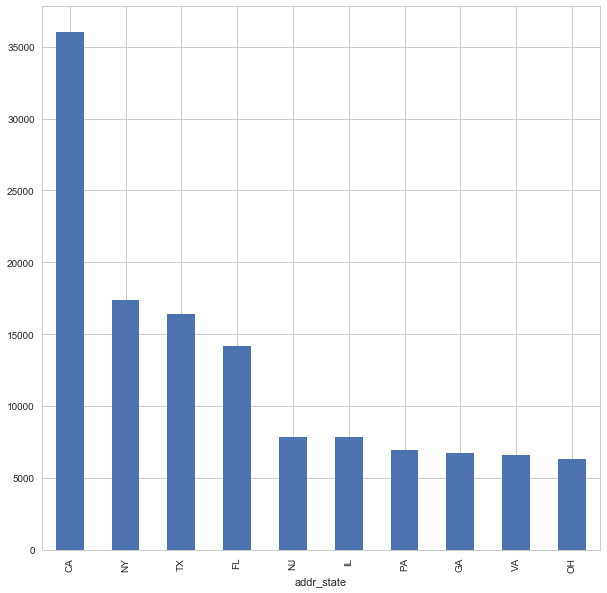

In [115]:
_=loans_df_fp[['id', 'addr_state']].groupby(by='addr_state')['id'].count().nlargest(10).plot(kind='bar')

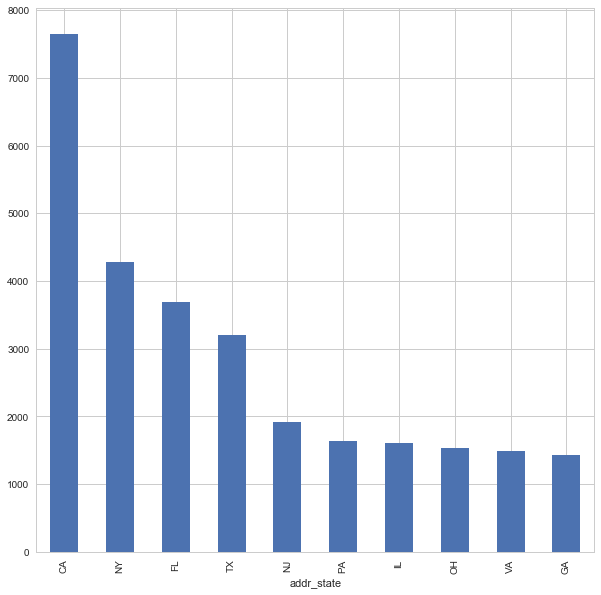

In [118]:
_=loans_df_def[['id', 'addr_state']].groupby(by='addr_state')['id'].count().nlargest(10).plot(kind='bar')

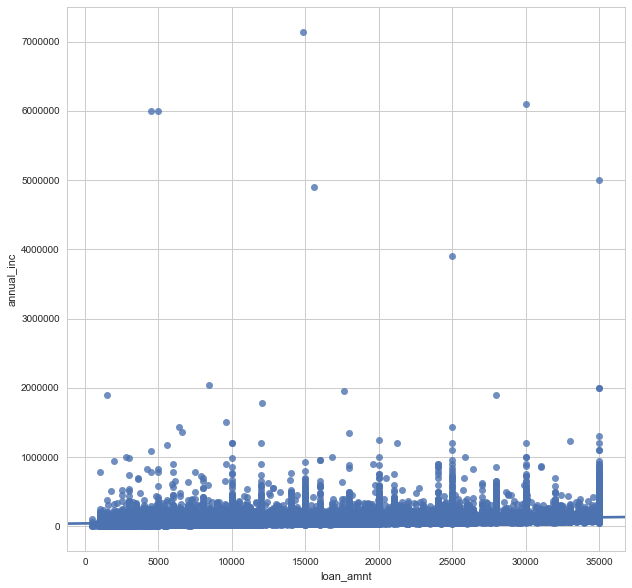

In [121]:
ax = sns.regplot(x="loan_amnt", y="annual_inc", data=loans_df_fp)

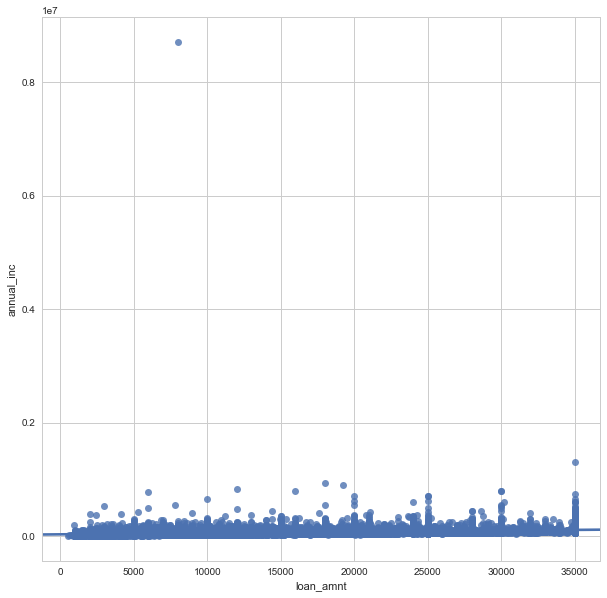

In [122]:
ax = sns.regplot(x="loan_amnt", y="annual_inc", data=loans_df_def)